|column|definition|
|---|---|
|**date**|Date in format DD/MM/YYYY|
|**tmax**|Maximum temperature of the day in °F|
|**tmin**|Minimum temperature of the day in °F|
|**tavg**|Average temperature of the day in °F|
|**departure**|Departure from normal temperature in °F|
|**HDD**|Heating Degree Days|
|**CDD**|Cooling Degree Days|
|**precipitation**|Precipitation in inches|
|**new_snow**|New snowfall in inches|
|**snow_depth**|Snowfall depth in inches.|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from matplotlib.dates import DateFormatter
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
df = pd.read_csv("nyc_temperature.csv")

# change the dates to a Timestamp
df["date"] = df["date"].apply(pd.to_datetime)
print(type(df["date"][0]))
#df.loc[df["precipitation"] == "T"]
df.head(13)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,2019-01-01,60,40,50.0,13.9,15,0,0.08,0,0
1,2019-02-01,41,35,38.0,2.1,27,0,0,0,0
2,2019-03-01,45,39,42.0,6.3,23,0,T,0,0
3,2019-04-01,47,37,42.0,6.5,23,0,0,0,0
4,2019-05-01,47,42,44.5,9.1,20,0,0.45,0,0
5,2019-06-01,49,32,40.5,5.3,24,0,T,0,0
6,2019-07-01,35,26,30.5,-4.5,34,0,0,0,0
7,2019-08-01,47,35,41.0,6.1,24,0,0.21,0,0
8,2019-09-01,46,35,40.5,5.8,24,0,0.07,0,0
9,2019-10-01,35,30,32.5,-2.1,32,0,0,0,0


In [3]:
# We clean out the T values in the last three columns

df["precipitation"] = df["precipitation"].replace({"T": 0})
df["new_snow"] = df["new_snow"].replace({"T": 0})
df["snow_depth"] = df["snow_depth"].replace({"T": 0})

In [4]:
# just making sure we don't have any T's left -> we don't!

# df.loc[df["precipitaion"] == "T"]
# df.loc[df["new_snow"] == "T"]
# df.loc[df["snow_depth"] == "T"]

In [5]:
# checking the type of data in the last three columns.. we want them to be floats

print(type(df["snow_depth"][0]))

<class 'str'>


In [6]:
# We transform these columns' data to type float

df["precipitation"] = df["precipitation"].apply(float)
df["new_snow"] = df["new_snow"].apply(float)
df["snow_depth"] = df["snow_depth"].apply(float)

In [7]:
# DISREGARD this code chunk.. I was just playing around and didn't find this insightful at all

# df.plot(x="date", y="tavg", kind="scatter")
# df.plot(x="date", y="tavg", kind="line")
# df.plot(x="date", y="tavg")

In [8]:
# DISREGARD this code chunk.. I was just playing around and didn't find this insightful at all

# model = LinearRegression()
# model.fit(np.matrix(df.index).reshape(-1,1), df["tavg"])
# b = model.intercept_
# m = model.coef_[0]

# plt.plot(df.index, df["tavg"])
# plt.plot(df.index, m * df.index + b)

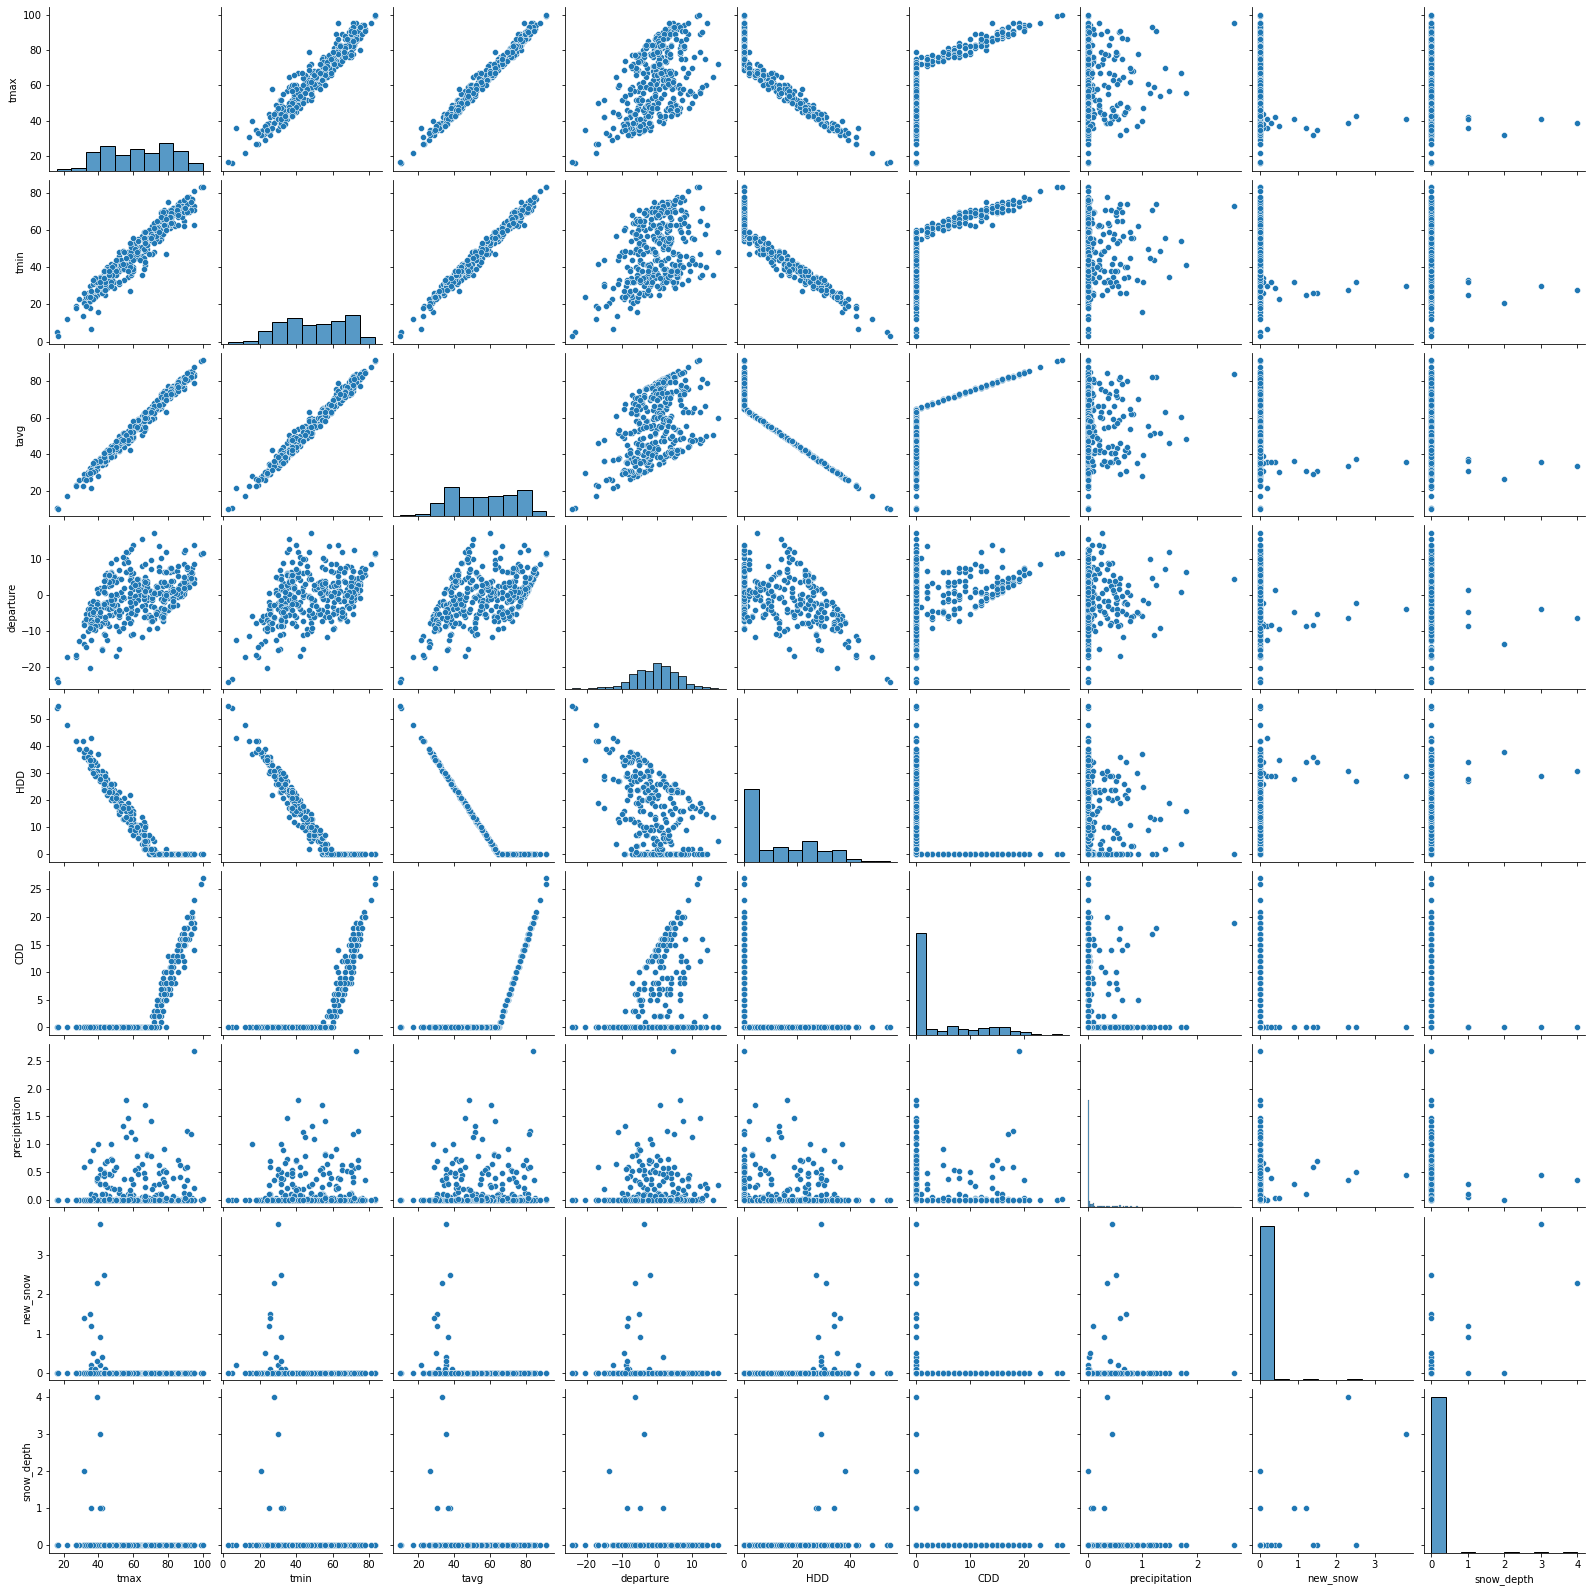

In [9]:
sns.pairplot(df)

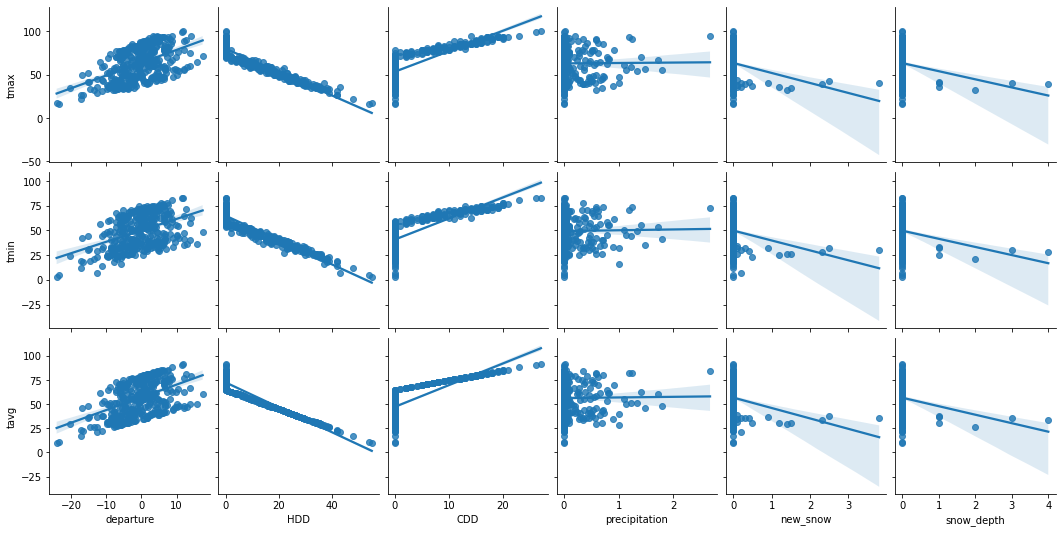

In [10]:
x_vars = ["departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]
y_vars = ["tmax", "tmin", "tavg"]

sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, kind="reg")

In [11]:
# df.corr()

# `Analying the correlation`<br>
It seems like `departure` and `HDD` and `CDD`  
are correlated with `tavg` but not the other columns  
Thus we'll use them in our regression model  
We will do a multicolliniarity test on them first though to make sure  
they're not collinear or multicollinear

In [12]:
df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr(method="spearman")

,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tavg,1.000000,0.452970,-0.972550,0.862062,-0.005781,-0.280274,-0.174390
departure,0.452970,1.000000,-0.408569,0.329066,0.018561,-0.214192,-0.115156
HDD,-0.972550,-0.408569,1.000000,-0.811016,-0.002108,0.287204,0.177737
CDD,0.862062,0.329066,-0.811016,1.000000,-0.095660,-0.151531,-0.094651
precipitation,-0.005781,0.018561,-0.002108,-0.095660,1.000000,0.221373,0.117494
new_snow,-0.280274,-0.214192,0.287204,-0.151531,0.221373,1.000000,0.416836
snow_depth,-0.174390,-0.115156,0.177737,-0.094651,0.117494,0.416836,1.000000


In [13]:
df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr()

,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tavg,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


<AxesSubplot:>

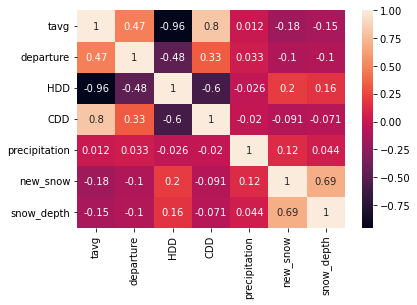

In [14]:
sns.heatmap(df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr(), annot=True)

In [15]:
# calculate_vif was taken from
#https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [16]:
tavg_df = df[["tavg","departure","HDD","CDD"]]

calculate_vif(tavg_df, features=["departure","HDD","CDD"])

,VIF,Tolerance
departure,1.300773,0.768774
HDD,1.811162,0.552132
CDD,1.571583,0.636301


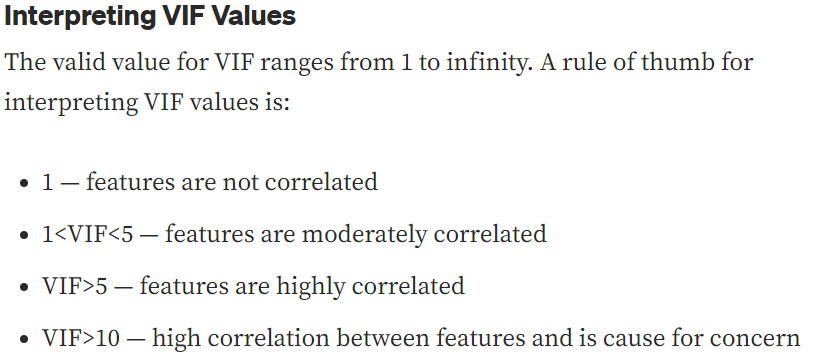

#### Since the `variance inflation factor` isn't alarmingly high among the columns, we will not ommit any of these variables from the model.

In [17]:
X = df[["departure","HDD","CDD"]]
y = df["tavg"]

tavg_reg = LinearRegression().fit(X,y)
tavg_predicted = tavg_reg.predict(X)


# sm.add_constant(X)
# sm_model = sm.OLS(X, y)
# sm_results = sm_model.fit()
# sm_results.summary()

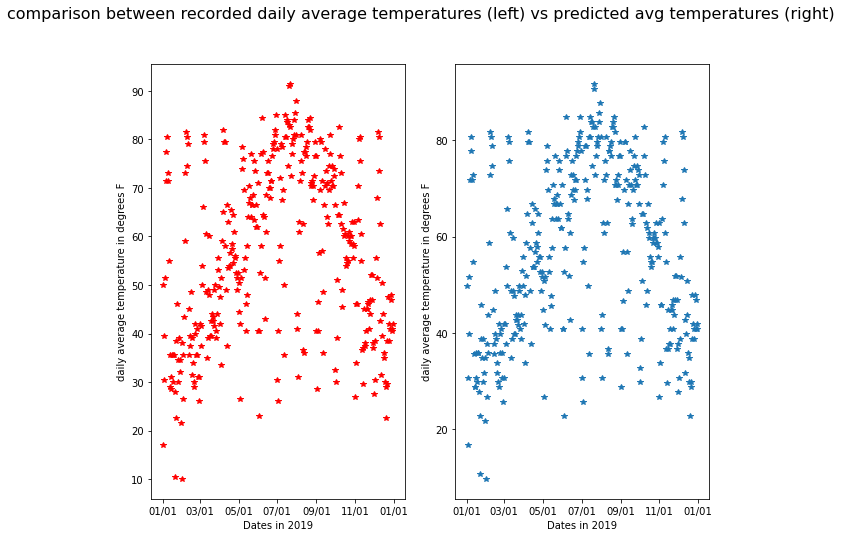

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("comparison between recorded daily average temperatures (left)"+
             " vs predicted avg temperatures (right)", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel="daily average temperature in degrees F")
ax2.set(xlabel="Dates in 2019",
       ylabel="daily average temperature in degrees F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tavg"], "r*")
ax2.plot(df["date"],tavg_predicted, "*")
plt.show()

In [19]:
tavg_residuals = df["tavg"] - tavg_predicted
print(tavg_reg.score(X,y))

QQ = ProbPlot(tavg_residuals)

plt.show()

0.9998057764134336


$$R^2 = 0.9998$$

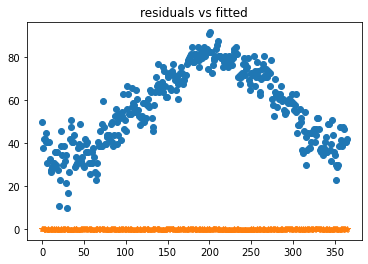

In [20]:
plt.plot(tavg_predicted, "o")
plt.plot(tavg_residuals, "*")
plt.title("residuals vs fitted")
plt.show()

In [21]:
OLS_model = sm.OLS(y, sm.add_constant(X))
model_fit = OLS_model.fit()
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tavg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.194e+05
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:35:54   Log-Likelihood:                -9.0216
No. Observations:                 365   AIC:                             26.04
Df Residuals:                     361   BIC:                             41.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7296      0.027   2403.285      0.000      64.677      64.783
departure      0.0039      0.002      1.660      0.098      -0.001       0.008
HDD           -0.9984      0.001   -752.849      0.000      -1.001      -0.996
CDD            0.9979      0.003    388.184      0.000       0.993       1.003
==============================================================================
Omnibus:                     1690.482   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.560
Skew:                           0.090   Prob(JB):                     3.17e-13
Kurtosis:                       1.063   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

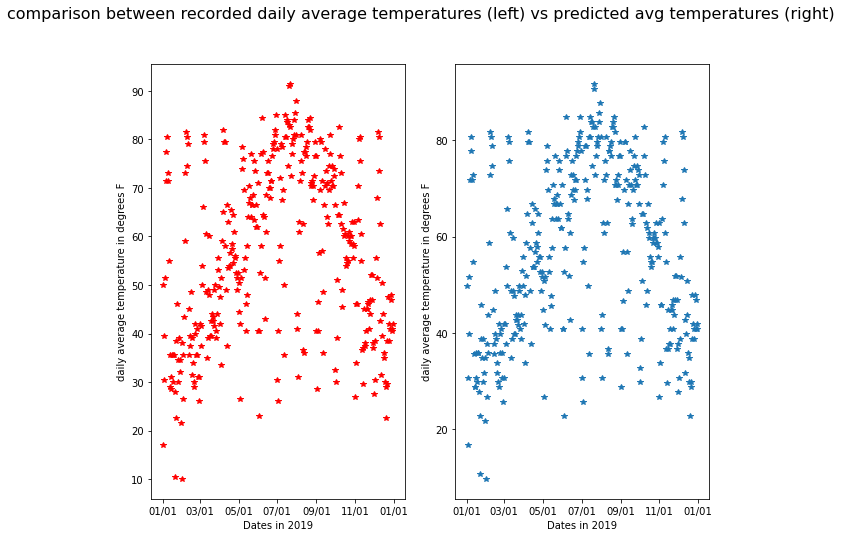

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("comparison between recorded daily average temperatures (left)"+
             " vs predicted avg temperatures (right)", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel="daily average temperature in degrees F")
ax2.set(xlabel="Dates in 2019",
       ylabel="daily average temperature in degrees F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tavg"], "r*")
ax2.plot(df["date"],model_fitted_y, "*")
plt.show()

C:\Users\yousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


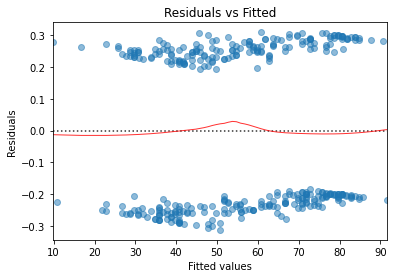

In [23]:

desired_df = pd.concat([X, y], axis=1) # creating a df from X, y for easier plot handling

model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # normalize residuals

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absoulte squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals

model_leverage = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, desired_df.columns[-1], data=desired_df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={"color":"red", "lw":1, "alpha":0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


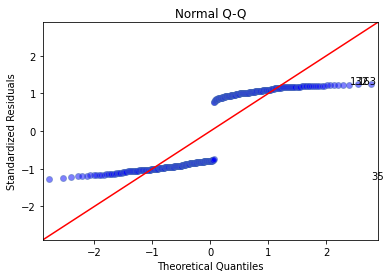

In [24]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [25]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_fit, "points", fig=fig)

# TODO: please fix this bug.. I can't figure out why the code is crashing
# here is the link to the code
# https://www.statology.org/residual-plot-python/

ValueError: 'points' is not in list

<Figure size 864x576 with 0 Axes>

In [ ]:
df["log_HDD"] = (df["HDD"]-np.mean(df["HDD"]))/np.sqrt(np.var(df["HDD"]))
df["log_HDD"] = np.log(np.abs(df["log_HDD"]))
# df["log_CDD"] = (df["CDD"]-np.mean(df["CDD"]))/np.sqrt(np.var(df["CDD"]))
df["log_CDD"] = np.sqrt(np.abs(df["log_CDD"]))

df["departure_transformed"] = (df["departure"]-np.mean(df["departure"]))/np.sqrt(np.var(df["departure"]))

# sns.histplot(df["log_HDD"])
# sns.histplot(df["departure_transformed"])
# sns.histplot(df["departure"])
# df.loc[df["precipitation"] == np.inf]
# for i in df["log_HDD"]:
#     print(i)

In [ ]:
X = df[["departure","log_HDD","CDD"]]
y = df["tavg"]
OLS_model = sm.OLS(y, sm.add_constant(X))
model_fit = OLS_model.fit()
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

In [ ]:
desired_df = pd.concat([X, y], axis=1) # creating a df from X, y for easier plot handling

model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # normalize residuals

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absoulte squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals

model_leverage = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, desired_df.columns[-1], data=desired_df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={"color":"red", "lw":1, "alpha":0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
X = df[["tavg"]]
y = df["tmax"]

avg_to_hot_reg = LinearRegression().fit(X,y)

avg_to_hot_predicted = avg_to_hot_reg.predict(tavg_predicted.reshape(-1,1))